<a href="https://colab.research.google.com/github/naghmeadibi/CHW04_ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [4]:
# TO DO: Read CSV file
# TO DO: Display first few rows of the dataframe
df = pd.read_csv('AirlineSatisfaction.csv')

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Section 3. EDA

Shape of the data: (25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location          

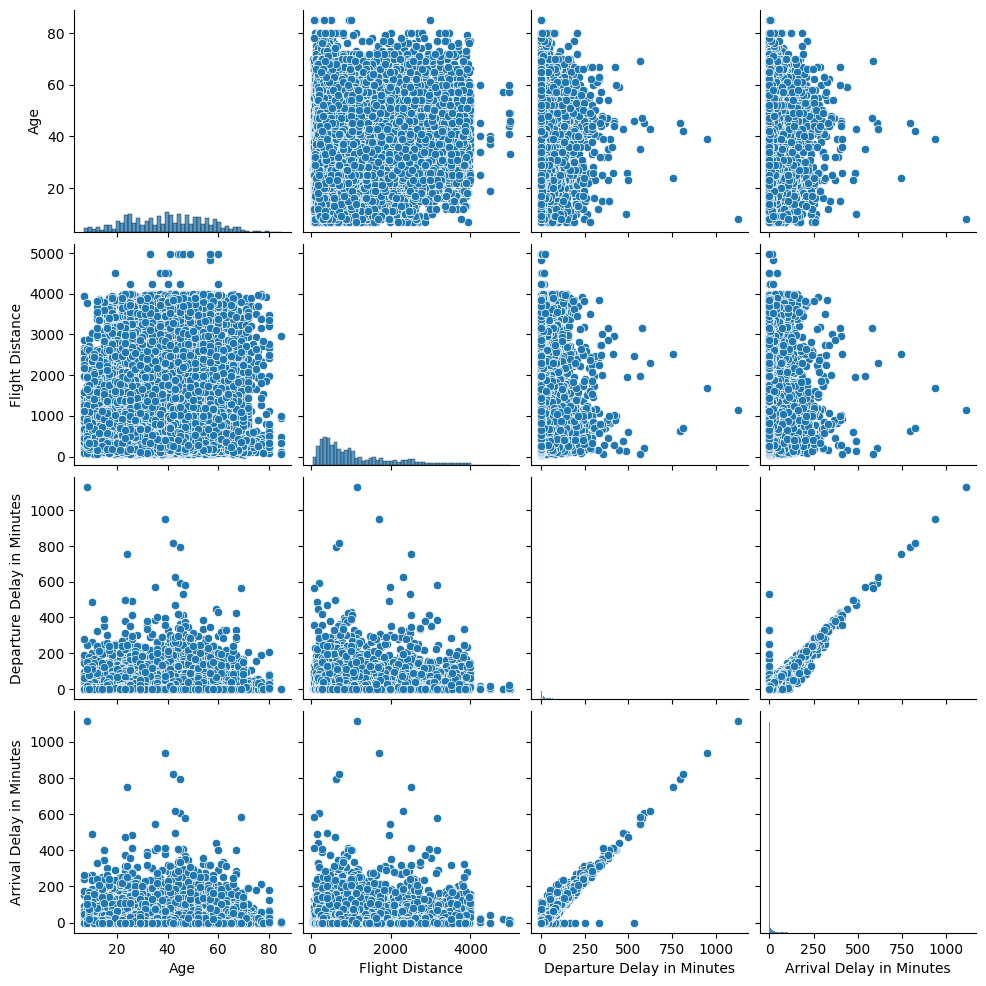

In [5]:
# TODO: Print the shape of the data

# TODO: Print the information about the dataframe

# TODO Display the summary statistics of the dataframe

# Print the shape of the data
print("Shape of the data:", df.shape)

# Print information about the dataframe
print(df.info())

# Display summary statistics of the dataframe
print(df.describe())

# Removing unnecesary columns

df=df.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0

# TODO: Print the number of NaN values in each column of the dataframe

# TO DO: Create a pairplot using Seaborn library

# Replace any NaN values in the dataframe with 0
df = df.fillna(0)

# Print the number of NaN values in each column of the dataframe
print("Number of NaN values in each column:")
print(df.isnull().sum())

# Create a pairplot using Seaborn library
sns.pairplot(df)

## Section 5. Model Building | Training

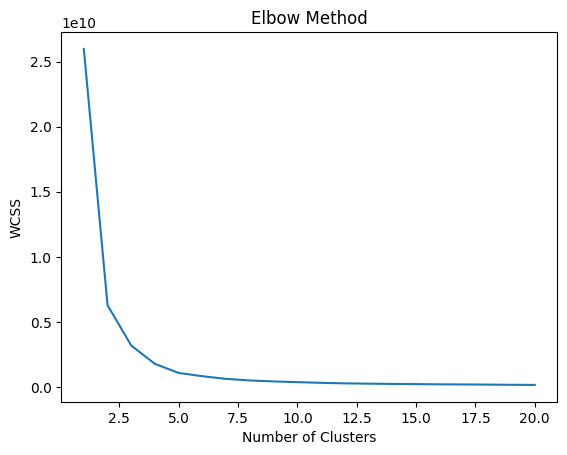

In [6]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
# TO DO: Plot the WCSS for each number of clusters
# Elbow method to determine optimal number of clusters
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

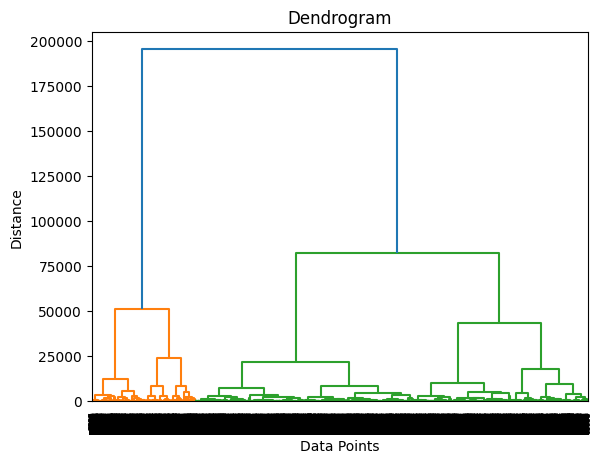

In [7]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
# TO DO: Plot the dendrogram
# Create a dendrogram using hierarchical clustering
linkage_matrix = sch.linkage(df, method='ward')
sch.dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

## Section 6. K Means Clustering

In [8]:
# TO DO: Create a KMeans model with the best number of clusters
# TO DO: Fit the KMeans model to the data and assign the resulting
# cluster labels to a new column in the dataframe
# Create a list to store the inertia values
inertia_values = []

# Try different number of clusters from 2 to 10
for n_clusters in range(2, 11):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the model to the data
    kmeans.fit(df)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Find the index of the minimum inertia value
best_n_clusters_index = inertia_values.index(min(inertia_values))

# Get the best number of clusters based on the index
best_n_clusters = best_n_clusters_index + 2

# Create a KMeans model with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters)

# Fit the model to the data and assign cluster labels to a new column in the dataframe
df['cluster_label'] = kmeans.fit_predict(df)

## Section 7. Agglomerative Clustering

In [10]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage

# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe

# Create the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the data and assign cluster labels
df['cluster_labels'] = model.fit_predict(df)

## Section 8. Clusters Visualization

In [14]:
# TO DO: Remove outliers from the dataframe to improve visualization
import scipy
df = df[(np.abs(scipy.stats.zscore(df)) < 3).all(axis=1)]

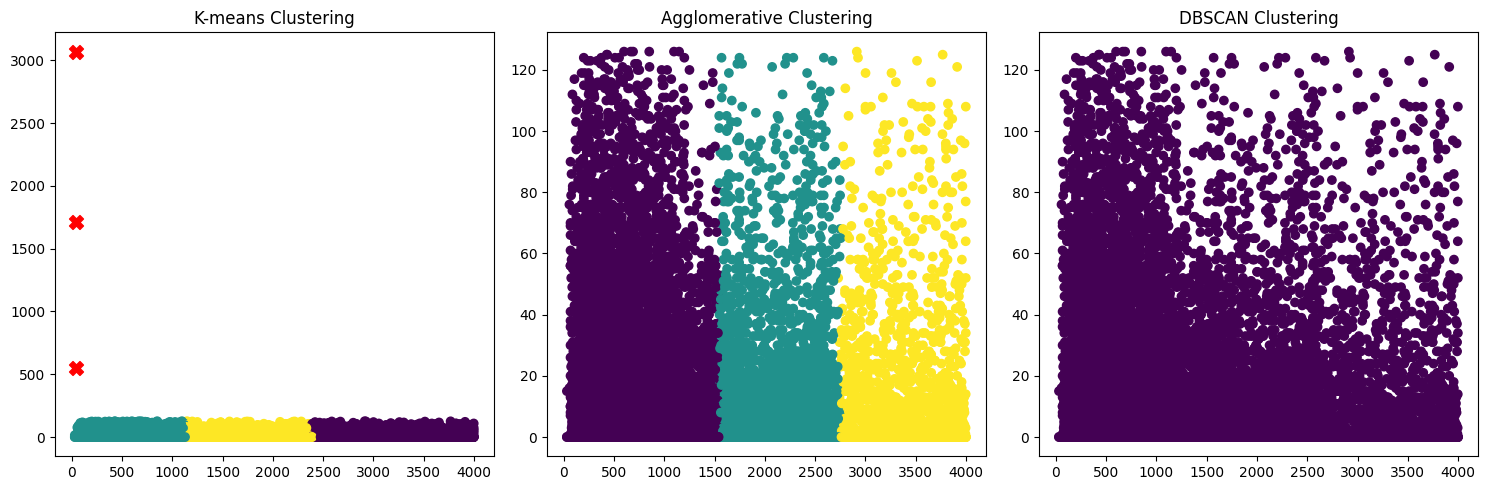

In [22]:
# TO DO: Create a scatter plot with subplots for each clustering method
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly
# Creating scatter plot with subplots for each clustering method
import sklearn.cluster
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels_kmeans = kmeans.labels_
centroids_kmeans = kmeans.cluster_centers_

axs[0].scatter(df['Flight Distance'], df['Arrival Delay in Minutes'], c=labels_kmeans)
axs[0].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker='X', color='red', s=100)
axs[0].set_title('K-means Clustering')

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(df)

axs[1].scatter(df['Flight Distance'], df['Arrival Delay in Minutes'], c=labels_agglo)
axs[1].set_title('Agglomerative Clustering')

# DBSCAN clustering
dbscan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df)

axs[2].scatter(df['Flight Distance'], df['Arrival Delay in Minutes'], c=labels_dbscan)
axs[2].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()